# 2편. 따릉이, 이용량은 얼마나 변했을까?

이번에 알아보려고 하는 것은, **2015년 9월 - 2018년 11월까지의 따릉이 사용량**에 대한 이야기다.  
즉, 이전에 없던 **시간의 개념**이 분석에 더해진다.  
년도, 월에 따라 사용량이 어떻게 달라지는지. 각 지역별로 차이가 있는지 등, 시간에 따라 사용량이 어떻게 달라지는지, 세세히 살펴보자.  
여기서 사용량은 대여량 + 반납량을 말한다.

In [23]:
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import missingno as msno
import warnings
warnings.filterwarnings('ignore')

mpl.rcParams['axes.unicode_minus'] = False
plt.rcParams["font.family"] = 'NanumGothic'

import json
import folium

geo_path = 'data/seoul_municipalities_geo_simple.json'
geo_str = json.load(open(geo_path, encoding='utf-8'))

## 데이터 로드

In [2]:
df = pd.read_csv('data/서울시 공공자전거 이용현황.csv', parse_dates=['기준일자'])
df.head()

,대여소위치,대여소명,기준일자,대여건수,반납건수
0,동작구,2067. LG전자 베스트샾 대리점 앞,2018-11-30,16,11
1,양천구,726. 목동3단지 시내버스정류장,2018-11-30,30,27
2,양천구,725. 양강중학교앞 교차로,2018-11-30,14,5
3,양천구,724. 계남공원 입구 주출입구 좌측,2018-11-30,3,0
4,양천구,723. SBS방송국,2018-11-30,38,44


In [3]:
df.tail()

,대여소위치,대여소명,기준일자,대여건수,반납건수
721656,마포구,104. 합정역 1번출구 앞,2015-09-19,11,10
721657,마포구,103. 망원역 2번출구 앞,2015-09-19,18,19
721658,마포구,102. 망원역 1번출구 앞,2015-09-19,13,14
721659,마포구,101. (구)합정동 주민센터,2015-09-19,5,8
721660,그룹명 없음,대여소명 없음,2015-09-19,0,17


In [4]:
df.shape

(721661, 5)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 721661 entries, 0 to 721660
Data columns (total 5 columns):
대여소위치    721661 non-null object
대여소명     721661 non-null object
기준일자     721661 non-null datetime64[ns]
대여건수     721661 non-null int64
반납건수     721661 non-null int64
dtypes: datetime64[ns](1), int64(2), object(2)
memory usage: 27.5+ MB


### 결측치 확인

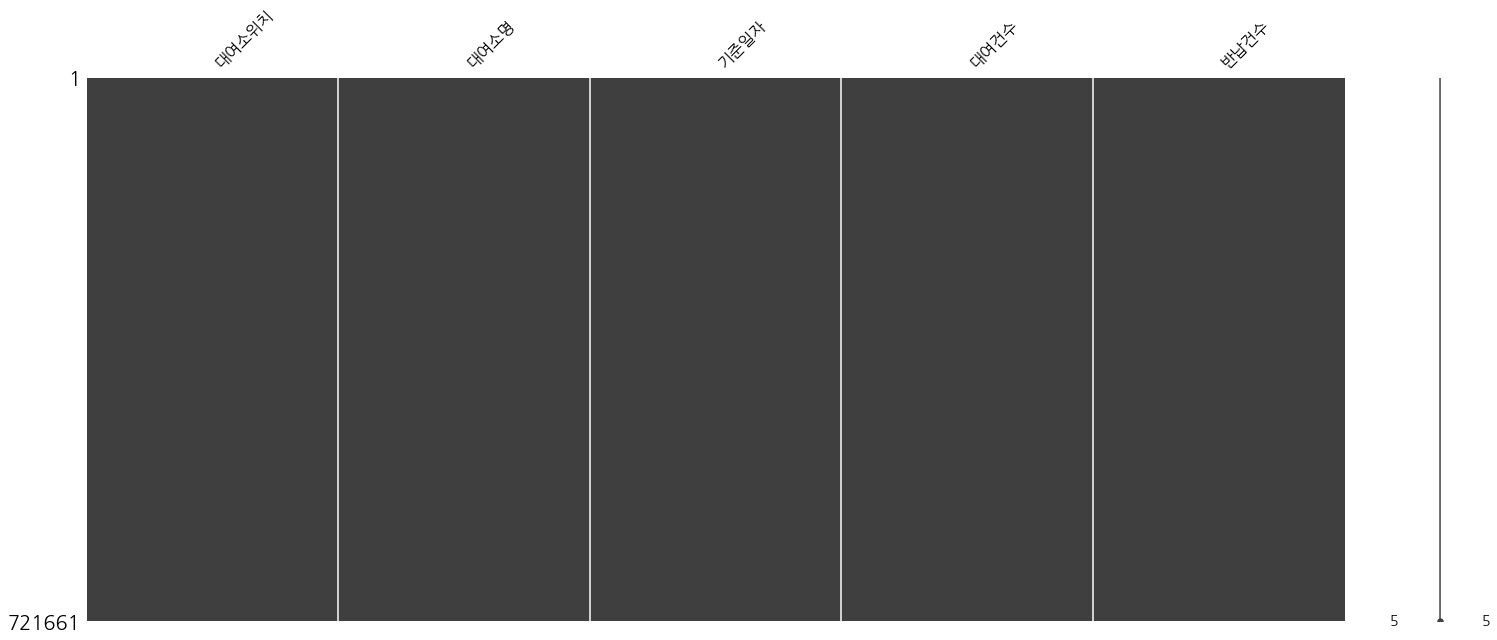

In [6]:
msno.matrix(df)
plt.show()

결측치 없이 깔끔함.

### 시간 피처 추가

In [8]:
df['년'] = df['기준일자'].dt.year
df['월'] = df['기준일자'].dt.month
df['일'] = df['기준일자'].dt.day

### 특정 피처 값들 확인

불필요한 피처값 제거. 

In [9]:
df['대여소위치'].unique()

array(['동작구', '양천구', '마포구', '광진구', '송파구', '종로구', '중구', '관악구', '강서구',
       '노원구', '성동구', '강남구', '서초구', '강북구', '성북구', '용산구', '중랑구', '구로구',
       '도봉구', '강동구', '영등포구', '금천구', '서대문구', '은평구', '동대문구', '그룹명 없음'],
      dtype=object)

In [10]:
df = df[df['대여소위치'] != '그룹명 없음']

In [11]:
df['대여소위치'].unique()

array(['동작구', '양천구', '마포구', '광진구', '송파구', '종로구', '중구', '관악구', '강서구',
       '노원구', '성동구', '강남구', '서초구', '강북구', '성북구', '용산구', '중랑구', '구로구',
       '도봉구', '강동구', '영등포구', '금천구', '서대문구', '은평구', '동대문구'], dtype=object)

In [12]:
df['대여소명'].nunique()

1554

처리하기 쉽게 데이터타입 바꿔주기

In [15]:
df['대여소위치'] = df['대여소위치'].astype('category')
df['대여소명'] = df['대여소명'].astype('category')
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 720089 entries, 0 to 721659
Data columns (total 8 columns):
대여소위치    720089 non-null category
대여소명     720089 non-null category
기준일자     720089 non-null datetime64[ns]
대여건수     720089 non-null int64
반납건수     720089 non-null int64
년        720089 non-null int64
월        720089 non-null int64
일        720089 non-null int64
dtypes: category(2), datetime64[ns](1), int64(5)
memory usage: 40.6 MB


---

## 1. 연, 월 기준 사용량은 어떨까?
먼저 연, 월 기준으로 막대그래프를 그려보자.

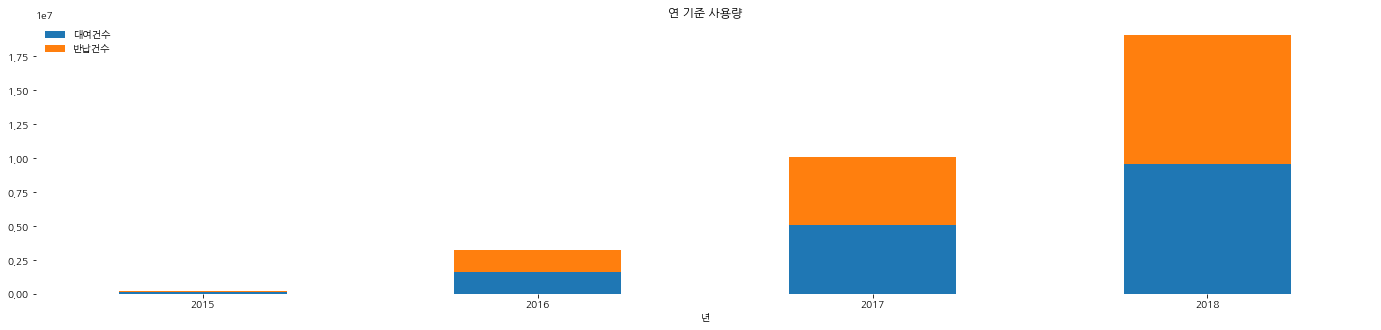

In [16]:
year = df.groupby(['년'])[['대여건수', '반납건수']].agg('sum')
ax = year.plot(kind='bar', figsize=(24, 5), rot=0, stacked=True, title="연 기준 사용량")
plt.box(False)
plt.legend(loc='upper left',frameon=False)
plt.show()

확실히 해가 지날수록, 사용량이 많이 늘고있음을 알 수 있다.  
다음으로 월 기준으로 보면,

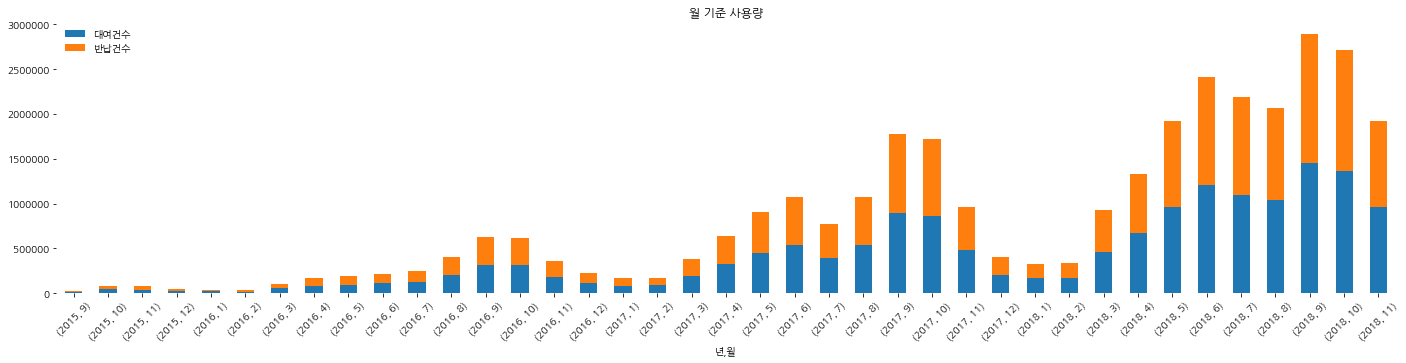

In [17]:
month = df.groupby(['년', '월'])[['대여건수', '반납건수']].agg('sum')
month.plot(kind='bar', figsize=(24, 5), rot=45, stacked=True, title="월 기준 사용량")
plt.box(False)
plt.legend(frameon=False)
plt.show()

여름 전후인, **5월 그리고 9, 10월에 피크를 찍고, 가장 사용량이 많은 달은 9월**이다.  
**추운 겨울과, 더운 여름에는 사용량이 줄어드는 듯 보인다.**  
무엇보다, 1년을 주기로 이러한 패턴을 보인다. 즉, 데이터 패턴을 볼 때, 기본적으로 **1년 단위**로 봐야한다.  

그럼 해가 지나면서 얼마나 늘었을까?  
가장 피크인 달인 9월을 기준으로 직전 해 대비 증가율을 살펴보자.

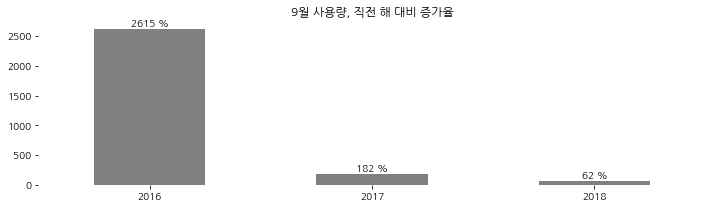

In [19]:
september = month.loc[[(2015, 9), (2016, 9), (2017, 9), (2018, 9)]]['대여건수']
increasing_ratio = []
for i, year in enumerate(september):
    if i == 0:
        continue
    increasing_ratio.append((september[i] - september[i-1]) / september[i-1] * 100)
increasing_ratio = pd.Series(increasing_ratio, index=["2016", "2017", "2018"])

ax = increasing_ratio.plot(kind='bar', figsize=(10, 3), rot=0, title="9월 사용량, 직전 해 대비 증가율", color='grey')
for p in ax.patches:
    ax.annotate("%d %%"%p.get_height(), (p.get_x()+p.get_width()/2, p.get_height()+50), ha='center')
plt.box(False)
plt.tight_layout()
plt.show()

2016년에는 2015년 대비 2615% 나 증가했다가, 그 이후로는 직전 해 대비 증가율이 확 감소하긴 했지만,  
작년 대비 사용량은 꾸준히 증가했으므로, 절대적인 값은 더 클 것이다. (굳이 살펴보진 않겠다.)

## 2. 지역구별로 사용량은 다를까?

전체 기간, 즉 15년 9월 - 18년 11월 동안의 각 지역별 사용량을 살펴보자.

In [20]:
sum_of_use = df.groupby('대여소위치')[['대여건수', '반납건수']].sum()
sum_of_use.head()

,대여건수,반납건수
대여소위치,,
강남구,531907,490723
강동구,388399,404836
강북구,191176,194769
강서구,474419,501111
관악구,454347,454576


In [21]:
df[['대여건수', '반납건수']].corr()

,대여건수,반납건수
대여건수,1.000000,0.987565
반납건수,0.987565,1.000000


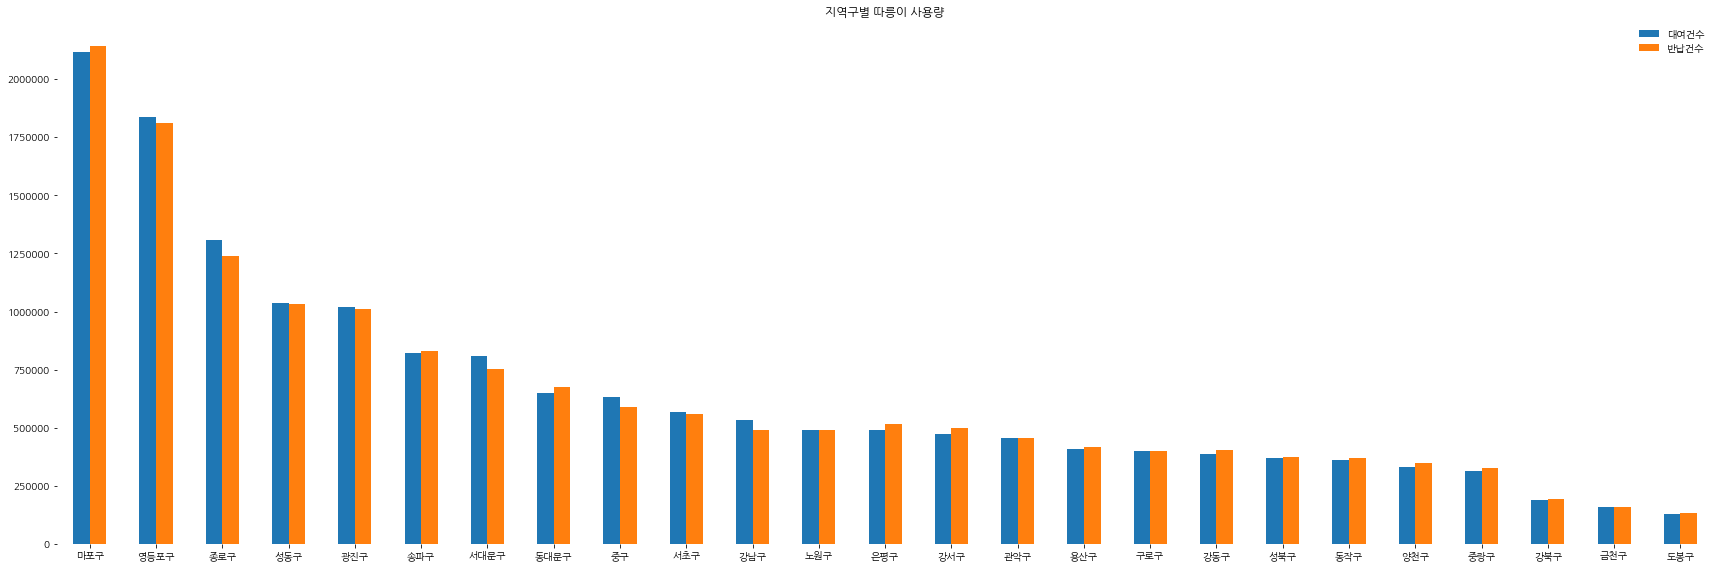

In [22]:
sum_of_use.sort_values('대여건수', ascending=False, inplace=True)
sum_of_use.plot(kind='bar', figsize=(24, 8), title="지역구별 따릉이 사용량", rot=0)
plt.xlabel("")
plt.box(False)
plt.tight_layout()
plt.legend(frameon=False)
plt.show()

In [25]:
bike_map = folium.Map(location=[37.541, 126.986], zoom_start=10.8, tiles='cartodbpositron')
folium.Choropleth(geo_data=geo_str,
                  data=sum_of_use,
                  columns=[sum_of_use.index, '대여건수'],
                  key_on='feature.properties.SIG_KOR_NM', 
                  fill_color='Blues').add_to(bike_map)
bike_map

-   대여량과 반납량은 비슷하다. (대여하면 반납하니 당연...)
-   마포와, 영등포의 사용량이 압도적으로 높다. 
-   제일 낮은 지역은 강북, 금천, 도봉이다.
-   제일 낮은 사용량과 제일 큰 사용량의 차이가 대략 16배 정도 난다. 너무 큰 데.. 이상하다.  

이전 포스트에서 2018년 11월 기준, 대여소가 가장 많은 곳은 강남 3구였다.  
**대여소가 많으면 일반적으로 사용량도 높을 것 같은데 왜 강남 3구 사용량은 별로 안높을까?**


여기서 이런 의문이 든다.

> 마포와 영등포에 가장 먼저 대여소들이 설치되고, 다른 지역은 뒤늦게 설치되어서, 자연스레 먼저 이용되고 있던 마포와 영등포만 너무 높은게 아닐까?

이를 확인해보기 위해, 잠깐 샛길로 빠져나와, 시간에 따른 각 지역구의 대여소 개수를 살펴보자.

### 2.1. 시간에 따른 각 지역구의 대여소 개수 살펴보기

데이터 전 기간동안의 각 지역별 대여소 개수를 히트맵으로 시각화 해보자.


In [27]:
pvt_num_rental = df.pivot_table(index=['대여소위치'], columns=['년', '월'], values='대여소명', aggfunc='nunique').fillna(0)
pvt_num_rental.head()

년     2015                2016                           ...  2018        \
월       9    10   11   12   1    2    3    4    5    6   ...    2     3    
대여소위치                                                    ...               
강남구    0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  65.0  70.0   
강동구    0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  42.0  42.0   
강북구    0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  28.0  28.0   
강서구    0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  39.0  39.0   
관악구    0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  34.0  42.0   

년                                                      
월        4     5     6     7     8     9     10    11  
대여소위치                                                  
강남구    78.0  77.0  78.0  79.0  80.0  82.0  93.0  96.0  
강동구    47.0  47.0  47.0  47.0  47.0  57.0  57.0  57.0  
강북구    35.0  35.0  35.0  36.0  36.0  36.0  37.0  37.0  
강서구    55.0  55.0  55.0  55.0  55.0  55.0  69.0  78.0  
관악구    45.0  46.0  46.0  46.0  46.0  46.0  49.0  51.0  

[5 rows x 39 columns]

In [28]:
pvt_num_rental.sort_values(by=[(2015, 9), (2015, 10)], ascending=False, inplace=True)

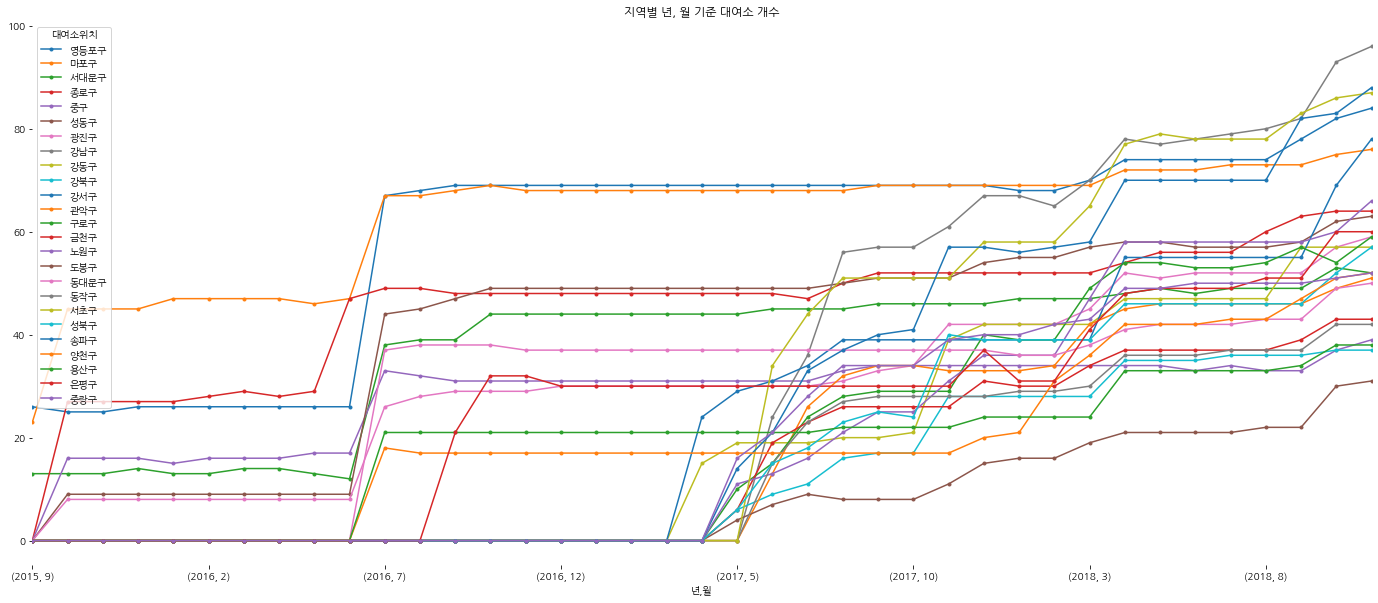

In [29]:
pvt_num_rental.T.plot(style='.-', figsize=(24, 10), title="지역별 년, 월 기준 대여소 개수")
plt.box(False)
plt.show()

위 같이 보면... 보기 너무 힘드니, 히트맵으로 그려보자.

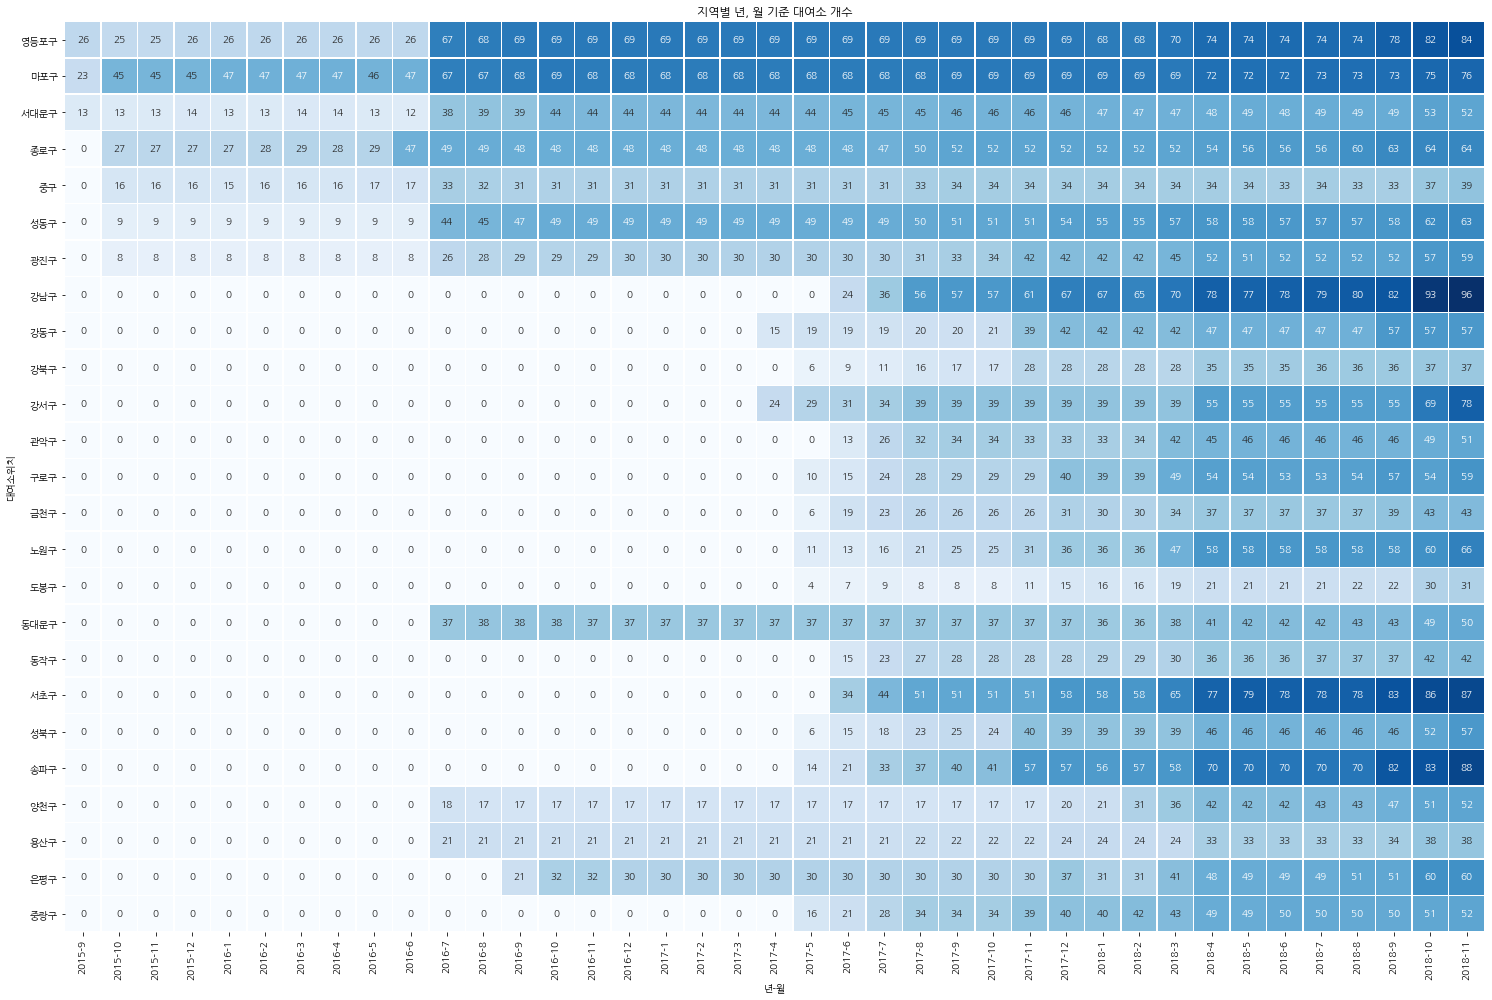

In [30]:
plt.figure(figsize=(24, 14))
sns.heatmap(pvt_num_rental, square=True, annot=True, cmap='Blues', linewidth=0.5, cbar=False)
plt.title("지역별 년, 월 기준 대여소 개수")
plt.tight_layout()
plt.show()

정리해보면, 

-   예상대로, 2015.10 이전부터, **영등포, 마포, 서대문**을 중심으로 대여소가**선행적으로 설치**되었다.
-   2015.10 에 종로, 중구, 성동, 광진구에 일부 대여소가 처음 설치되었고, 마포는 이전량의 2배를 늘어났다.
-   2016.7, 2017.5 을 기점으로, 기존 지역 및 새로운 지역들에 대여소가 설치됐다.
-   그 이후로, 계속해서 대여소는 늘어나고, 특히 **강남, 서초, 송파에 집중적으로 대여소들이 추가**되었다.

즉,** 강남 3구의 경우, 가장 많이 설치됐지만 가장 최근에 대량으로 설치되었기 때문에**, 대여소는 많지만 사용량이 적었던 것이다.

한편, 서울시는 전 지역에 골고루 대여소를 설치한게 아니라,   
**특정 시기에, 특정 지역에 집중적으로 대여소를 설치하는 방식으로 대여소를 늘려왔음**을 알 수 있다.  
이를 확인하기 위해, 시간에따른 전체 대여소 개수를 막대 그래프로 살펴보면, 아래와 같다.

#### 월, 연간 대여소 개수

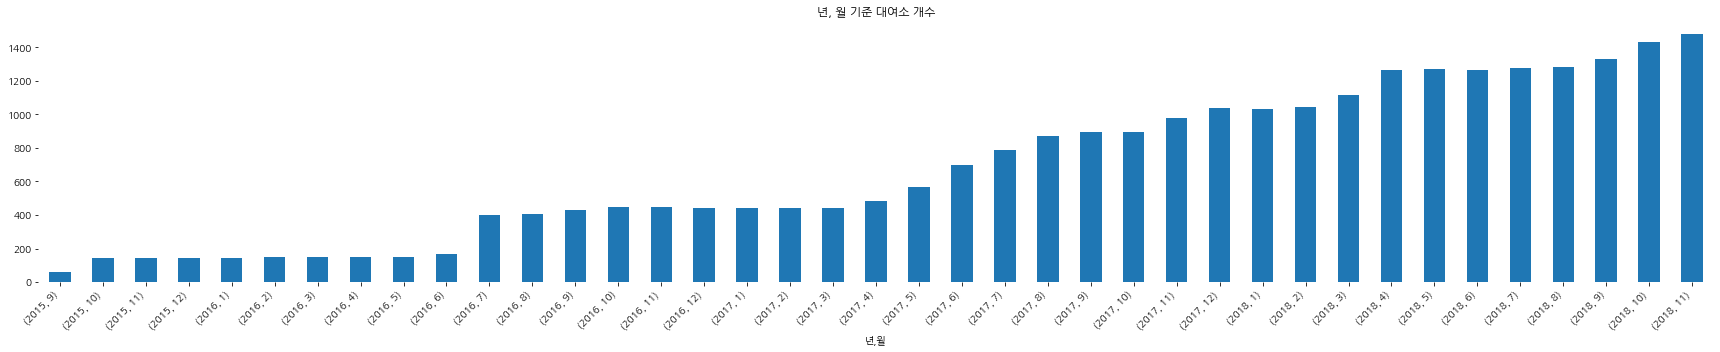

In [31]:
pvt_num_rental.sum(axis=0).plot(kind='bar', figsize=(24, 5), rot=45, title="년, 월 기준 대여소 개수")
plt.xticks(ha='right')
plt.box(False)
plt.tight_layout()
plt.show()

연별로 보면,

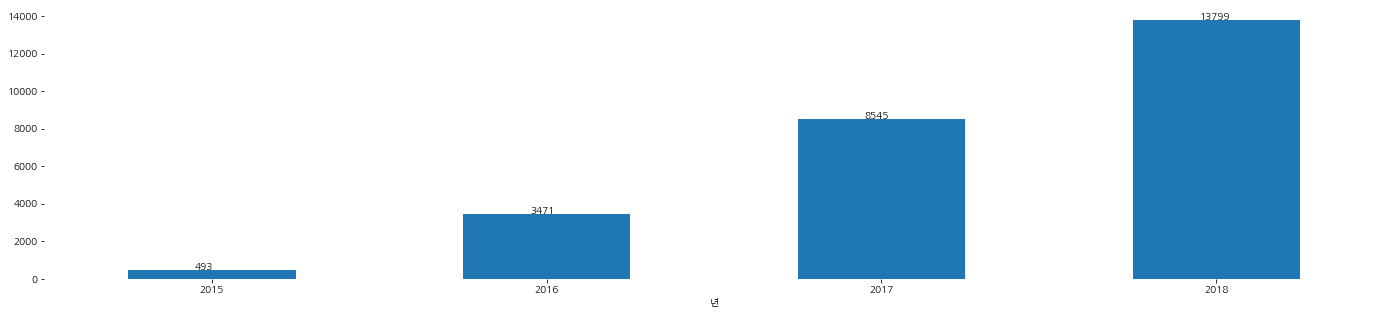

In [33]:
ax = pvt_num_rental.sum(axis=1, level=0).sum(axis=0).plot(kind='bar', figsize=(24, 5), rot=0)
for p in ax.patches:
    ax.annotate("%d"%p.get_height(), (p.get_x()+0.2, p.get_height()))
plt.box(False)
plt.show()

- 15->16 년에 가장 많이 만들고 (전해 대비 약 7배)
- 이후 꾸준히 늘려나가고 있음.

### 2.2. 시간에 따른 각 지역구의 사용량 살펴보기

먼저 러프하게, 선 그래프로 사용량 추세를 살펴보자.

#### 대여건수

In [34]:
region_index = list(pvt_num_rental.index)

In [35]:
pvt_num_use = df.pivot_table(index=['대여소위치'], columns=['년', '월'], values='대여건수', aggfunc='sum').fillna(0)
pvt_num_use = pvt_num_use.astype('int')
pvt_num_use = pvt_num_use.reindex(index=region_index)
pvt_num_use.head()

년      2015                      2016                                    ...  \
월        9      10     11    12    1     2      3      4      5      6   ...   
대여소위치                                                                    ...   
영등포구   4664   9789   6360  4138  3484  3533  12418  20418  20276  20697  ...   
마포구    4825  15982  13210  8205  6486  5958  16642  26594  32916  36106  ...   
서대문구   2105   4854   3412  1980  1592  1167   3602   5407   6331   7346  ...   
종로구       0   5747   8823  5085  3954  4243   9571  14487  17482  24299  ...   
중구        0   2289   3593  2029  1486  1497   3790   5644   7677   8912  ...   

년       2018                                                              \
월         2      3      4      5       6       7      8       9       10   
대여소위치                                                                      
영등포구   17460  45764  66980  90662  104375   96917  92000  127838  116389   
마포구    20042  52907  69011  92825  109284  100152  94014  128418  116132   
서대문구    8846  22334  28282  37977   46101   42321  39441   49112   46417   
종로구    15816  34980  42337  53100   63232   60110  58272   70272   68326   
중구      7957  17972  21904  26267   31496   29790  27064   34279   34859   

년             
월         11  
대여소위치         
영등포구   79519  
마포구    74520  
서대문구   34482  
종로구    54991  
중구     29525  

[5 rows x 39 columns]

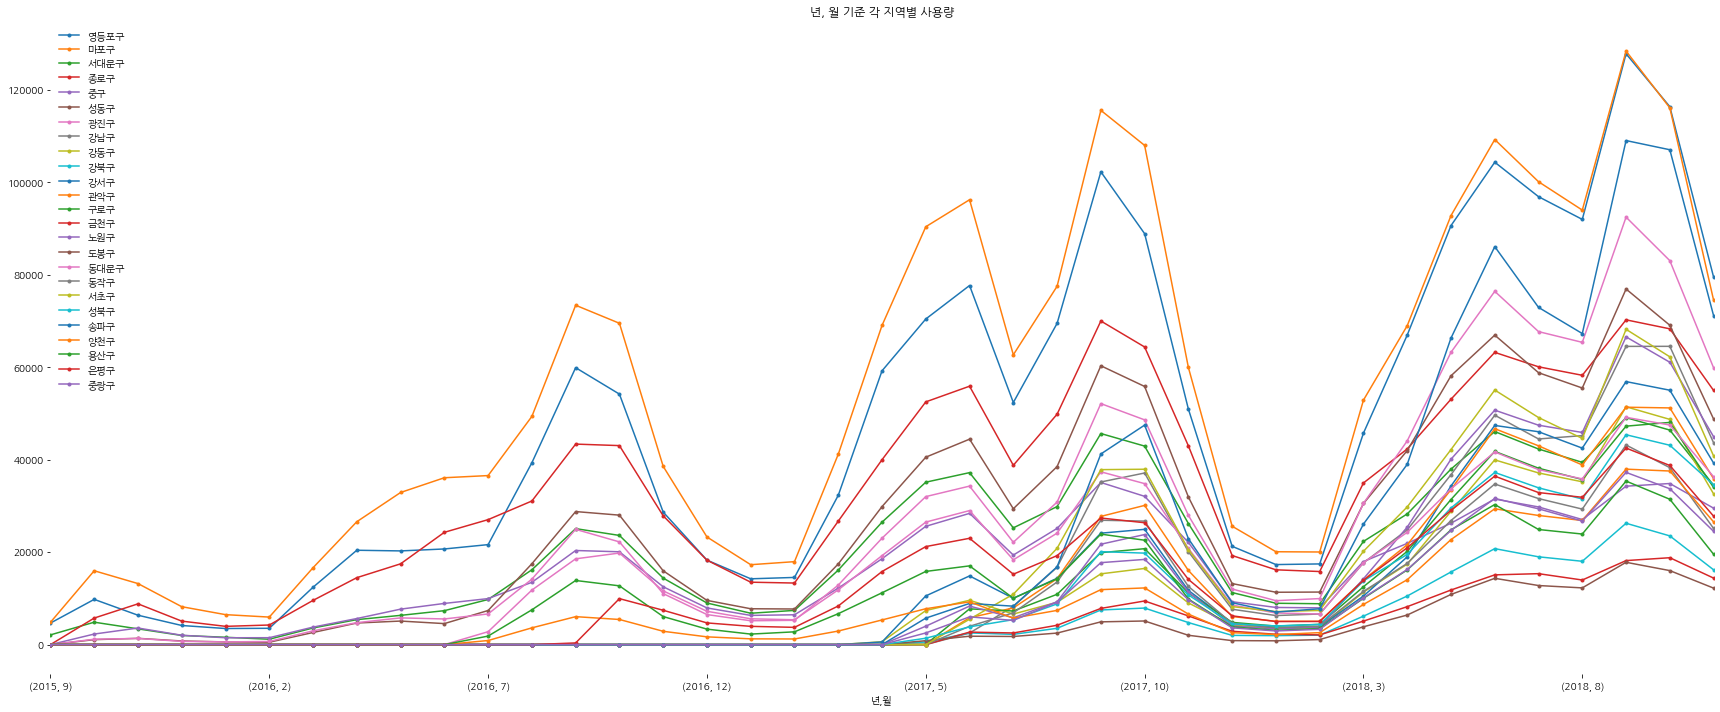

In [36]:
pvt_num_use.T.plot(style='.-', figsize=(24, 10), title="년, 월 기준 각 지역별 사용량")
plt.box(False)
plt.legend(frameon=False)
plt.tight_layout()
plt.show()

**어느 지역구도 예외 없이**, 일년 동안의 사용량 추세 패턴(여름 전후로 사용량이 제일 많은)이 같다.    
이를 좀 더 수치적으로 편하게 살펴보기 위해, 히트맵으로 시각화해서 보면,

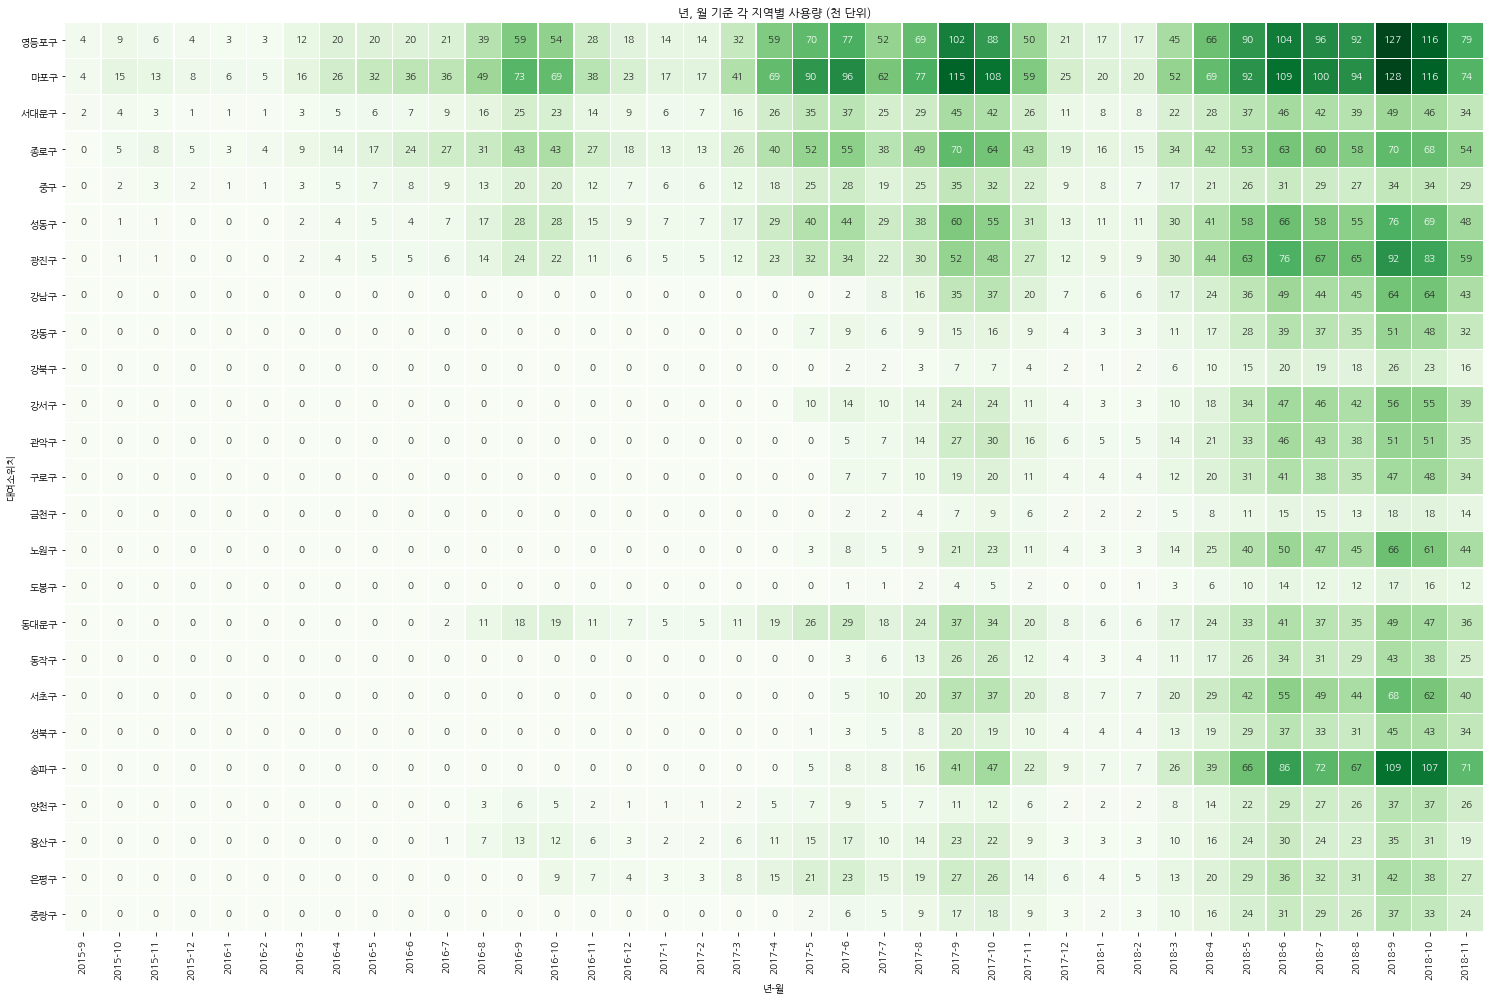

In [38]:
unit = 1000

plt.figure(figsize=(24, 14))
sns.heatmap((pvt_num_use/unit).astype('int'), square=True, cmap='Greens', linewidth=0.5, cbar=False, annot=True, fmt='d')
plt.title("년, 월 기준 각 지역별 사용량 (천 단위)")
plt.tight_layout()
plt.show()

#### 반납건수

In [39]:
pvt_num_return = df.pivot_table(index=['대여소위치'], columns=['년', '월'], values='반납건수', aggfunc='sum').fillna(0)
pvt_num_return = pvt_num_return.astype('int')
pvt_num_return = pvt_num_return.reindex(index=region_index)
pvt_num_return.head()

년      2015                      2016                                    ...  \
월        9      10     11    12    1     2      3      4      5      6   ...   
대여소위치                                                                    ...   
영등포구   4749   9986   6338  4195  3494  3493  12379  20378  20281  20748  ...   
마포구    4904  16065  13423  8167  6462  6037  16833  26884  33262  36533  ...   
서대문구   1808   4471   3220  1942  1530  1108   3461   5123   6135   7104  ...   
종로구       0   5510   8590  5108  3923  4079   9423  14163  17051  23941  ...   
중구        0   2343   3515  1887  1468  1513   3678   5588   7429   8443  ...   

년       2018                                                                    
월         2      3      4      5       6      7      8       9       10     11  
대여소위치                                                                           
영등포구   17318  45234  65809  89548  102555  94400  90595  127324  115395  78985  
마포구    20988  54356  69919  93571  109618  99988  94159  128084  118134  77357  
서대문구    7964  20633  26272  35344   42952  39572  36621   45970   42213  30661  
종로구    15313  32831  39595  49785   58460  55672  54660   65494   64640  53387  
중구      7684  17026  20466  24528   29013  26167  24128   31758   32298  27724  

[5 rows x 39 columns]

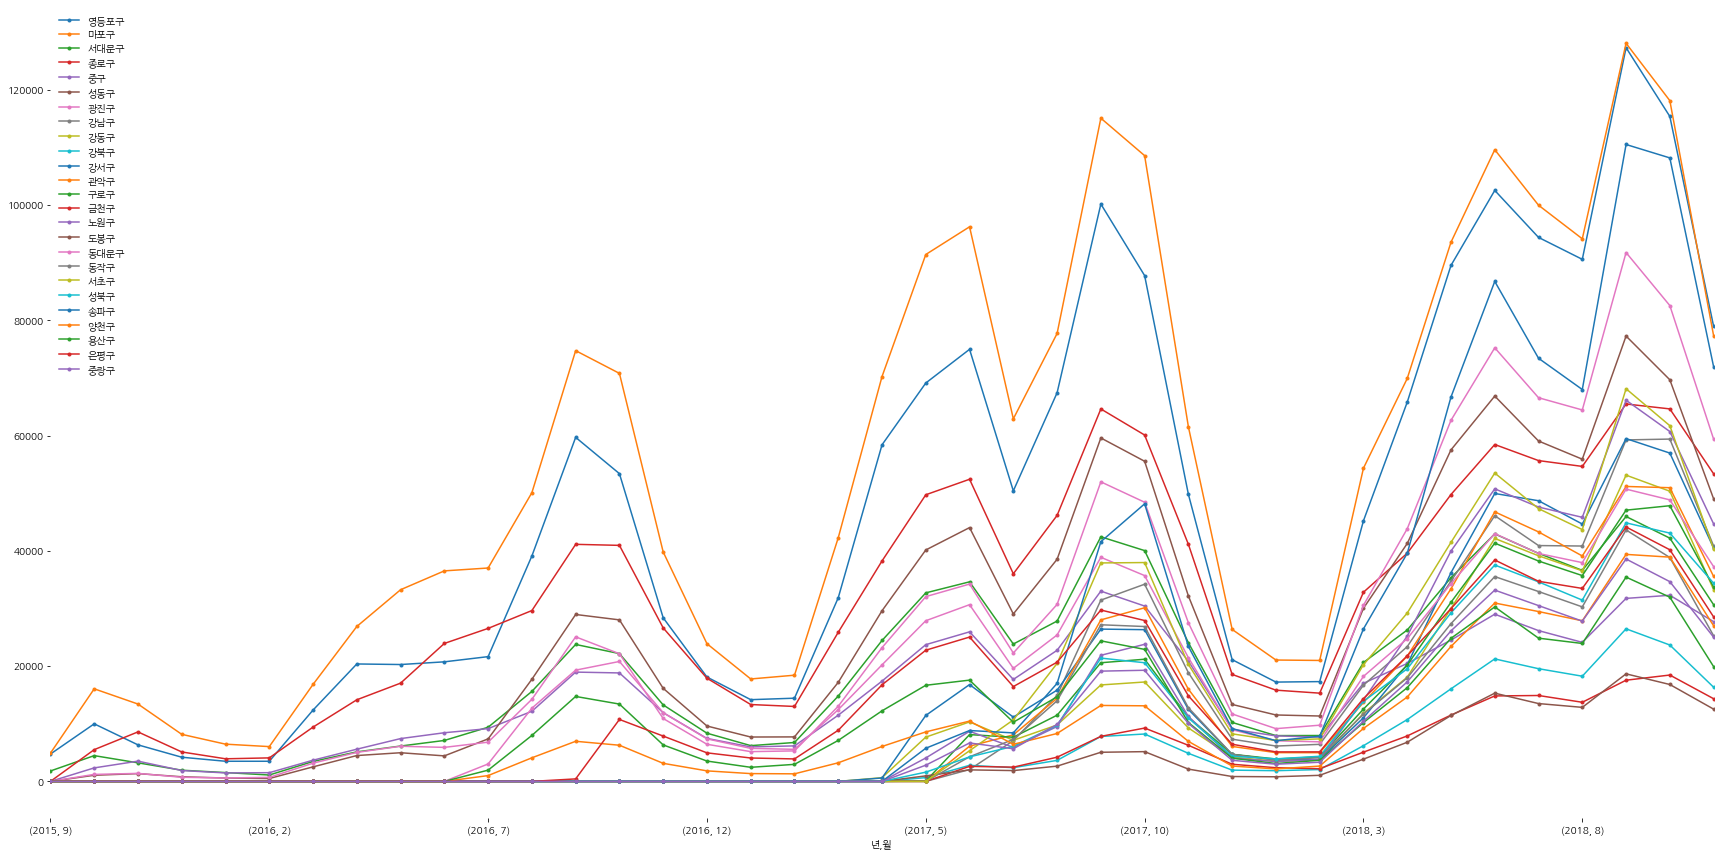

In [40]:
pvt_num_return.T.plot(style='.-', figsize=(24, 12))
plt.box(False)
plt.legend(frameon=False)
plt.tight_layout()
plt.show()

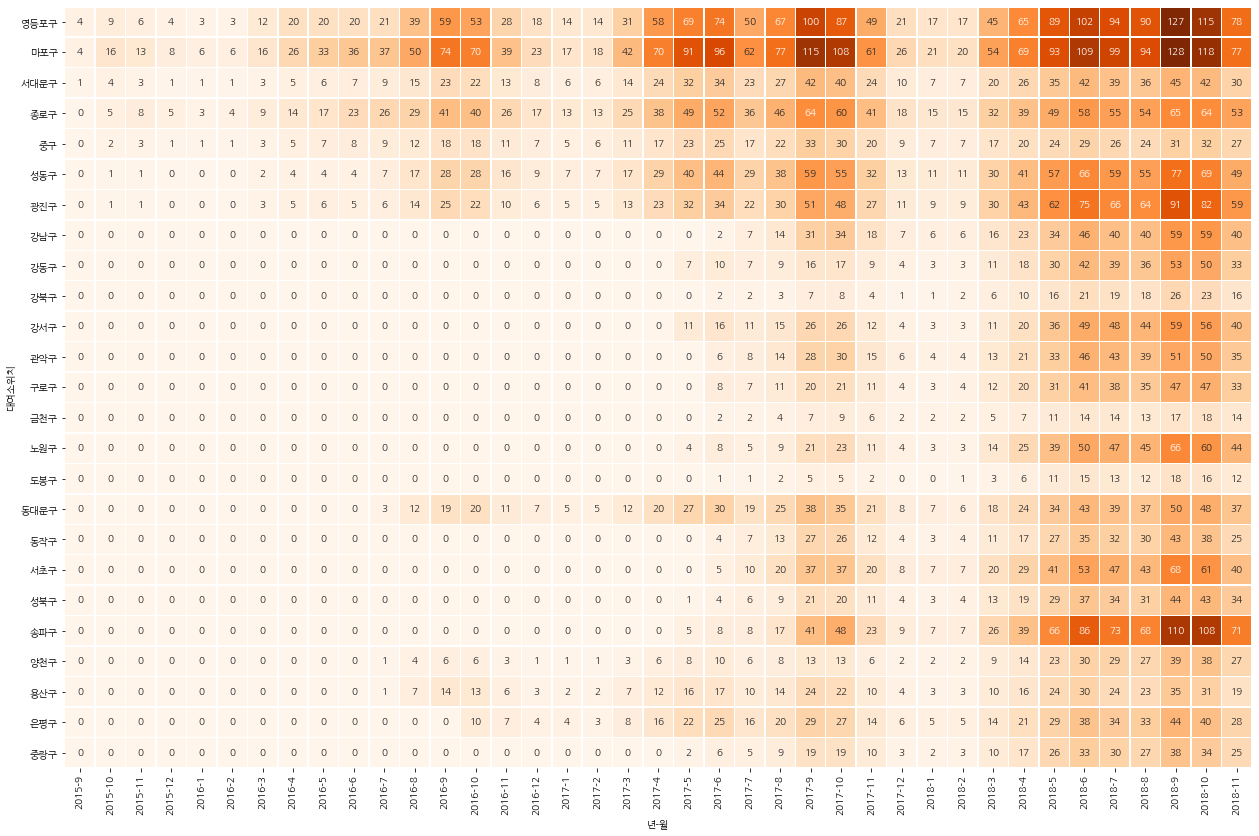

In [41]:
unit = 1000

plt.figure(figsize=(24, 14))
sns.heatmap((pvt_num_return/unit).astype('int'), square=True, cmap='Oranges', linewidth=0.5, cbar=False, annot=True, fmt='d')
plt.show()

반납건수도 대여건수와 별 다르지 않다.

정리하면, 
-   먼저, 0으로 값이 채워진 칸은, 당시에 대여소 설치가 아직 안됬기 때문이다.
-   어김 없이, 모든 지역에서 해가 지날수록 사용량이 많아진다.
-   **영등포, 마포는 초기 때부터, 꾸준하게 가장 사용량이 많은 지역**이다.
-   18년 11월 기준, 대여소 개수가 가장 많던**강남 3구 중, 눈에 띄게 사용량이 많은 지역은 송파**이다.

하지만, 위에서는 각지역별 대여소 개수를 고려하지 않고 사용량을 산출해냈기 때문에,   
지역간 사용량을 비교할 때, 이 값이 공정해보지 않는다.  
따라서, 지역간 좀 더 세밀하게 비교해보기 위해, 이번엔 지역별 대여소 개수까지도 고려한 값을 산출해보자.

### 2.3. 지역구별 대여소당 평균 이용량

좀 더 공정한 비교를 위해, 지역구별 대여소 개수까지 고려한, **지역의 대여소 평균 이용량**이라는 개념을 도입해보자.  
`지역의 대여소 평균 이용량 = 지역의 대여건수의 합 / 지역의 대여소 개수`로 정의된다.  
즉, 한 대여소당, 평균 이용량이 얼마나 되는지, 지역구별로 살펴보자.

In [42]:
pvt_use_ratio = (pvt_num_use / pvt_num_rental).fillna(0)
pvt_use_ratio = pvt_use_ratio.astype('int')
pvt_use_ratio = pvt_use_ratio.reindex(index=region_index)
pvt_use_ratio.head()

년     2015                2016                           ... 2018            \
월       9    10   11   12   1    2    3    4    5    6   ...   2    3    4    
대여소위치                                                    ...                  
영등포구   179  391  254  159  134  135  477  785  779  796  ...  256  653  905   
마포구    209  355  293  182  138  126  354  565  715  768  ...  290  766  958   
서대문구   161  373  262  141  122   89  257  386  487  612  ...  188  475  589   
종로구      0  212  326  188  146  151  330  517  602  517  ...  304  672  784   
중구       0  143  224  126   99   93  236  352  451  524  ...  234  528  644   

년                                               
월        5     6     7     8     9     10   11  
대여소위치                                           
영등포구   1225  1410  1309  1243  1638  1419  946  
마포구    1289  1517  1371  1287  1759  1548  980  
서대문구    775   960   863   804  1002   875  663  
종로구     948  1129  1073   971  1115  1067  859  
중구      772   954   876   820  1038   942  757  

[5 rows x 39 columns]

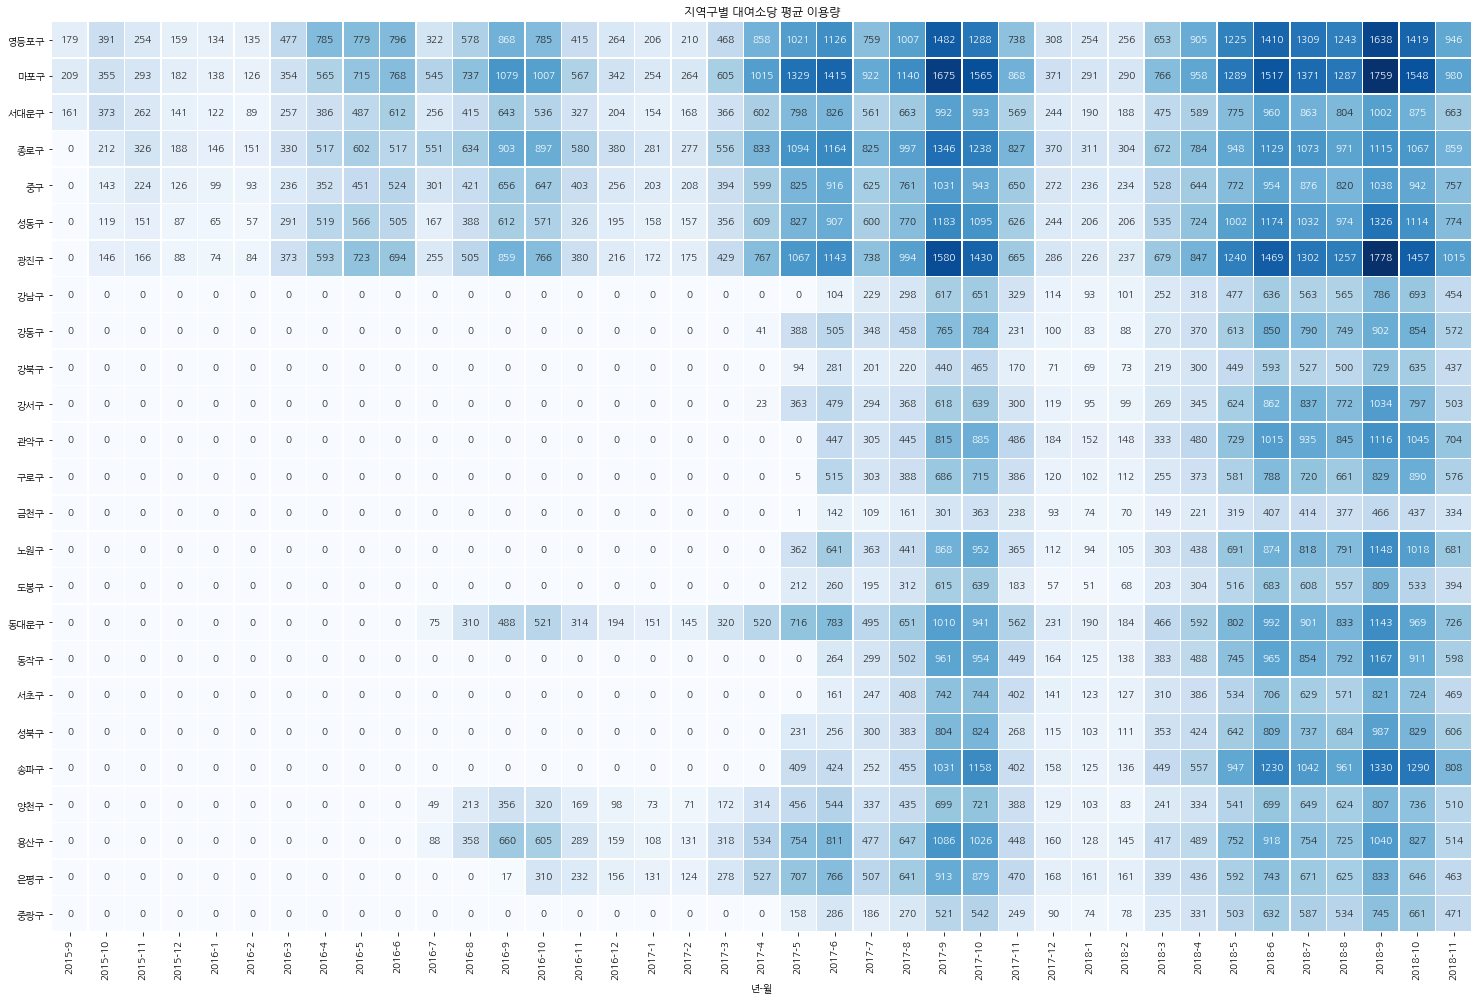

In [43]:
unit = 1

plt.figure(figsize=(24, 14))
sns.heatmap((pvt_use_ratio/unit).astype('int'), square=True, cmap='Blues', linewidth=0.5, cbar=False, annot=True, fmt='d')
plt.title("지역구별 대여소당 평균 이용량")
plt.ylabel("")
plt.tight_layout()
plt.show()

-   역시나, **마포, 영등포는 대여소당 평균 이용률도 가장 높은 편**이다.
-   새롭게 눈에 띄는 것은 **광진구**다. 전체 이용량이 높은 것은 아니었지만,   
    **자전거 대여소 대비 이용량이 많은 편이다. ****자전거 대여소를 늘려주면, 이용량 자체가 더 늘어날까?**
-   대여소가 많았던**강남 3구중, 송파를 제외한 다른 지역은 왜 이용률이 높지 않을까?**   
    대여소가 많이 설치되어도, 기대만큼 사람들이 잘 이용하지 않는걸까?   
    아니면 비교적 최근에 설치되어, 아직 사람들이 잘 모르는 걸까?

전체 기간은 아직 대여소가 설치 안된 시점을 포함하므로,   
**어느정도 대여소가 설치된 17년 11월 - 18년 11월의 데이터**만 가지고, 각 지역의 대여소당 평균 이용률의 합을 비교해보자.

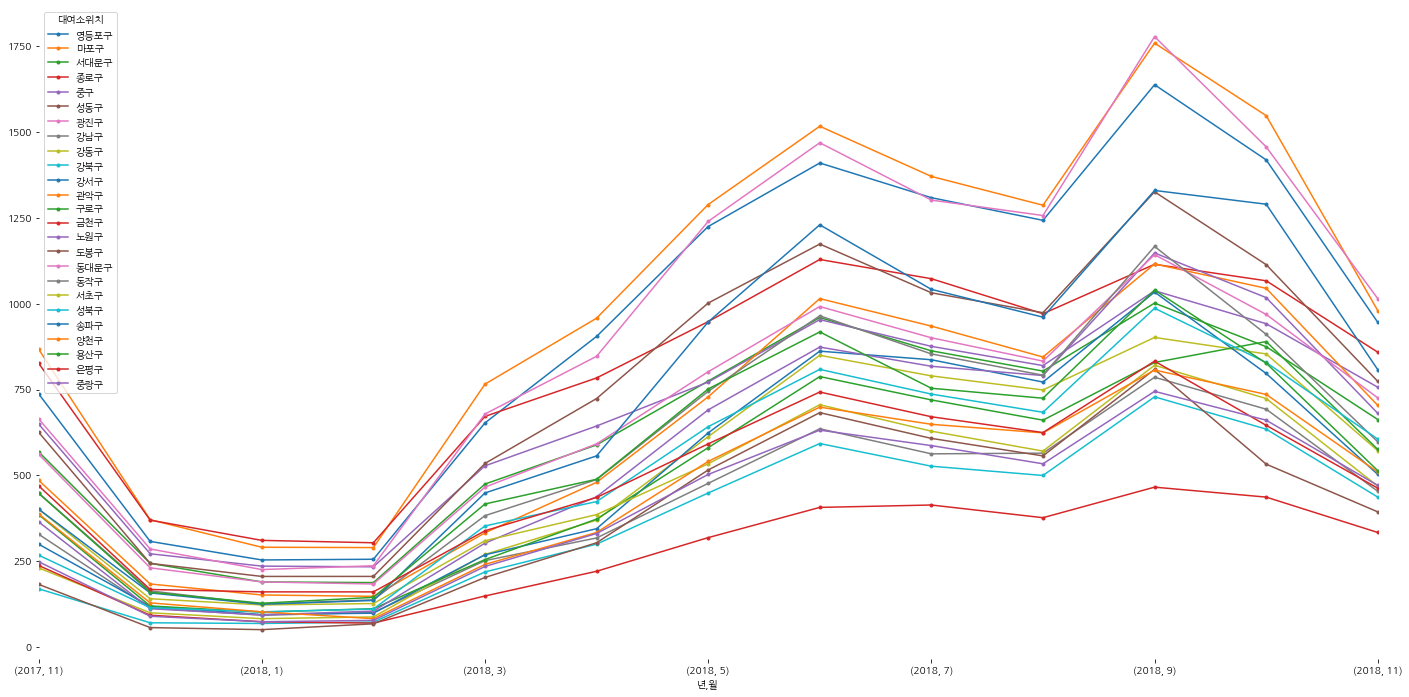

In [44]:
sum_use_ratio = pvt_use_ratio.T.loc[(2017, 11):(2018, 11)]
sum_use_ratio.plot(style='.-', figsize=(24, 12))
plt.box(False)
plt.show()

많이 이용하는 지역구 순위가 그렇게 크게 변동되지도 않고, 별다른 특이한 패턴을 보이지 않는다.  

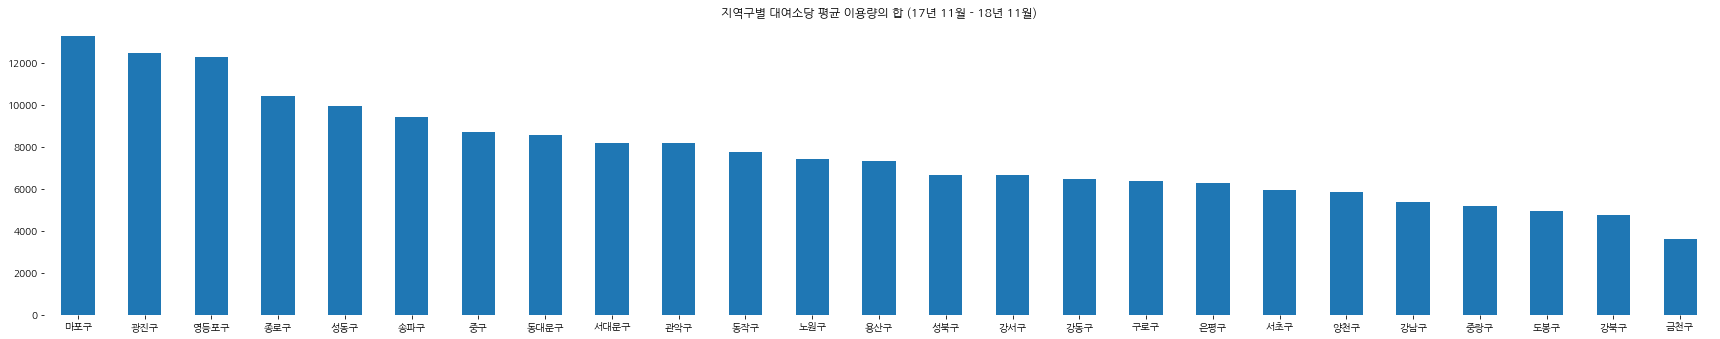

In [46]:
sum_use_ratio = pvt_use_ratio.T.loc[(2017, 11):(2018, 11)].T.sum(axis=1)
sum_use_ratio.sort_values(ascending=False, inplace=True)

sum_use_ratio.plot(kind='bar', figsize=(24, 5), rot=0, title="지역구별 대여소당 평균 이용량의 합 (17년 11월 - 18년 11월)", color='C0')
plt.box(False)
plt.tight_layout()
plt.xlabel("")
plt.show()

-   위에서 살펴본 것과 마찬가지로, **영등포, 마포, 광진구**가 제일 높다.
-   대여소당 평균 이용량이 가장 높은 지역(마포)과 낮은 지역(금천) 간의 차이가**약 4배 **가량 난다.

## 정리  

-   따릉이 이용률은 계속해서 증가하고 있지만, 증가율 폭은 이전 대비 감소하고 있다.
-   따릉이 이용이**가장 꾸준하게 잘 사용되었던 지역은 영등포, 마포**이다. 대여소당 평균 이용률도 높고, 주목해서 봐야할 지역이다.      
-   **따릉이 대여소는 초기에 특정 월에 몰아서 설치되었지만, 17년도 부터는 꾸준하게 설치**되었다.
-   **광진은 대여소당 특히 평균 이용률이 높은 편**이다.
-   **송파는 비교적 최근에 이용량**이 눈에띄게 높았다.

---

## 남아있는 질문들

### 질문 1) 해당 지역에 자전거 대여소가 많아지면, 전체 이용률도 올라갈까?

전체 이용률이.. 자전거 대여소 수에만 영향받는게 아니기 때문에. 자전거 대여소 수 증가 -> 전체 이용률 수 증가 인지 알 수 없을듯 하다.

### 질문 2) 일일 정류소당 대여건수를 예측해볼 수 있을까?

해볼만 한 것 같다.  
Kaggle Competition 에 꽤 유명한 "Predicting Bike sharing demand" 를 참고할 수도 있고, 일일 날씨 데이터와 조인하면, 시도해봄직 하다.  
추후 해볼만한 시도다.

---

## 데이터 출처 및 참고  
-   데이터는 [2018.11.12일자, 서울특별시 공공자전거 이용 정보(일별)](https://data.seoul.go.kr/dataList/datasetView.do?infId=OA-15246&srvType=F&serviceKind=1&currentPageNo=1) 를 사용했다.